In [1]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime

sns.set(style='ticks', palette='Set2')

def dateparse (timestamp):    
    return parser.parse(timestamp)

a1_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/takenDown042516/boxArduino042516_interpmin.csv', parse_dates=True, date_parser=dateparse, index_col='timestamp', header=0)
epa_ws_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/042516/ws042516.csv', parse_dates=True, date_parser=dateparse, index_col=0, skiprows=[0,1], names=['timestamp','wd','ws'])

a1_min.rename(columns=lambda x: x.strip(), inplace=True)
epa_ws_min.rename(columns=lambda x: x.strip(), inplace=True)

a1_min.head()

,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp
timestamp,,,,,,,,,
2016-04-15 06:13:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000
2016-04-15 06:14:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279
2016-04-15 06:15:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197
2016-04-15 06:16:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000
2016-04-15 06:17:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000


In [2]:
#pull in other excel files, merge together

a2_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/takenDown052316/boxArduino052316_interpmin.csv', parse_dates=True, date_parser=dateparse, index_col='timestamp', header=0)
epa2_ws_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/052316/ws052316.csv', parse_dates=True, date_parser=dateparse, index_col=0, skiprows=[0,1], names=['timestamp','wd','ws'])

a3_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/takenDown061316arduino/boxArduino061316_interpmin.csv', parse_dates=True, date_parser=dateparse, index_col='timestamp', header=0)
epa3_ws_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/061316arduino/ws061316.csv', parse_dates=True, date_parser=dateparse, index_col=0, skiprows=[0,1], names=['timestamp','wd','ws'])

a2_min.rename(columns=lambda x: x.strip(), inplace=True)
epa2_ws_min.rename(columns=lambda x: x.strip(), inplace=True)

a3_min.rename(columns=lambda x: x.strip(), inplace=True)
epa3_ws_min.rename(columns=lambda x: x.strip(), inplace=True)


print "length of a1 = %s" % len(a1_min)
print "length of a2 = %s" % len(a2_min)
print "length of a3 = %s" % len(a3_min)

a1_min = pd.concat([a1_min, a2_min, a3_min])
epa_ws_min = pd.concat([epa_ws_min, epa2_ws_min, epa3_ws_min])

print "length of a1 after join = %s" % len(a1_min)

a1_min.head()

length of a1 = 14888
length of a2 = 40701
length of a3 = 23159
length of a1 after join = 78748


,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp
timestamp,,,,,,,,,
2016-04-15 06:13:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000
2016-04-15 06:14:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279
2016-04-15 06:15:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197
2016-04-15 06:16:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000
2016-04-15 06:17:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000


In [3]:
#epa_ws_min.drop(epa_ws_min.index[0], inplace=True)
epa_ws_min.head()

,wd,ws
timestamp,,
2016-04-15 06:13:00,9,8.3
2016-04-15 06:14:00,41,5.7
2016-04-15 06:15:00,11,3.5
2016-04-15 06:16:00,13,3.0
2016-04-15 06:17:00,14,5.3


In [4]:
print len(a1_min), len(epa_ws_min)

print '----arduino max vals-----'
print a1_min.max()
print '----arduino min vals excluding zero-----'
print a1_min[a1_min > 0].min()

print '----epa max vals-----'
print epa_ws_min.max()
print '----epa min vals-----'
print epa_ws_min.min()

print '----'
print list(a1_min.columns.values)
print a1_min[a1_min > 0]['pressureWind'].min()

78748 78748
----arduino max vals-----
alphaS3_aux       818.000000
pressureWind    31693.902481
alphaS1_aux       984.000000
alphaS2_aux        89.672981
sharpDust         817.000000
alphaS3_work      984.000000
alphaS2_work      986.743729
alphaS1_work      977.322884
alphaTemp          68.000000
dtype: float64
----arduino min vals excluding zero-----
alphaS3_aux        42.321113
pressureWind    30250.594999
alphaS1_aux         7.000000
alphaS2_aux         5.000000
sharpDust           0.107727
alphaS3_work       28.240059
alphaS2_work        3.342961
alphaS1_work        3.000000
alphaTemp          57.622663
dtype: float64
----epa max vals-----
wd    360.0
ws     23.6
dtype: float64
----epa min vals-----
wd    0.0
ws    0.1
dtype: float64
----
['alphaS3_aux', 'pressureWind', 'alphaS1_aux', 'alphaS2_aux', 'sharpDust', 'alphaS3_work', 'alphaS2_work', 'alphaS1_work', 'alphaTemp']
30250.5949987


In [5]:
#data prep:
#scale arduino wind values to match range of WS from measurement

#(1) there are a few outlier '0' values (when it's centered around 30250 or so), and this first takes care of that

#(2) this also takes the absolute value about the average pressure measured on the arduino, so we get single sided
#values that map to windspeed and not windspeed+direction

#(3) it scales the final values to be between 0 and max value seen in m/s by the EPA sensor

minval = a1_min[a1_min > 0]['pressureWind'].min()
maxval = a1_min['pressureWind'].max()
scale = 19.4

a1_min['scaled_arduino_ws'] = [(max(0, (val - minval) ) / (maxval-minval) * scale) for val in a1_min['pressureWind']]

ws_avg_val = a1_min['scaled_arduino_ws'].mean()
a1_min['scaled_arduino_ws'] = [abs(val-ws_avg_val) for val in a1_min['scaled_arduino_ws']]

scale = scale / a1_min['scaled_arduino_ws'].max()
a1_min['scaled_arduino_ws'] = [val * scale for val in a1_min['scaled_arduino_ws']]

print '----arduino max vals-----'
print a1_min.max()
print '----arduino min vals excluding zero-----'
print a1_min[a1_min > 0].min()

a1_min.head()

----arduino max vals-----
alphaS3_aux            818.000000
pressureWind         31693.902481
alphaS1_aux            984.000000
alphaS2_aux             89.672981
sharpDust              817.000000
alphaS3_work           984.000000
alphaS2_work           986.743729
alphaS1_work           977.322884
alphaTemp               68.000000
scaled_arduino_ws       19.400000
dtype: float64
----arduino min vals excluding zero-----
alphaS3_aux          4.232111e+01
pressureWind         3.025059e+04
alphaS1_aux          7.000000e+00
alphaS2_aux          5.000000e+00
sharpDust            1.077266e-01
alphaS3_work         2.824006e+01
alphaS2_work         3.342961e+00
alphaS1_work         3.000000e+00
alphaTemp            5.762266e+01
scaled_arduino_ws    5.535214e-07
dtype: float64


,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,scaled_arduino_ws
timestamp,,,,,,,,,,
2016-04-15 06:13:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,19.400000
2016-04-15 06:14:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1.379399
2016-04-15 06:15:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,0.097451
2016-04-15 06:16:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,0.039971
2016-04-15 06:17:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,1.635925


In [6]:
#join dataframes

result = pd.concat([a1_min, epa_ws_min], axis=1, join_axes=[a1_min.index])

result.head()

,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,scaled_arduino_ws,wd,ws
timestamp,,,,,,,,,,,,
2016-04-15 06:13:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,19.400000,9,8.3
2016-04-15 06:14:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1.379399,41,5.7
2016-04-15 06:15:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,0.097451,11,3.5
2016-04-15 06:16:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,0.039971,13,3.0
2016-04-15 06:17:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,1.635925,14,5.3


In [7]:
#create moving average with some number of points for a column
num_avg = 30

ref_col = 'scaled_arduino_ws'
avg_col= 'avg_30_scaled_arduino_ws'
result[avg_col] = result[ref_col].rolling(window=num_avg, center=True).mean()

ref_col = 'ws'
avg_col= 'avg_30_ws'
result[avg_col] = result[ref_col].rolling(window=num_avg, center=True).mean()

Optimization terminated successfully.
         Current function value: 456079.147161
         Iterations: 98
         Function evaluations: 190
nelder-mead minimization= [ 0.91796877  3.97687249]

Optimization terminated successfully.
         Current function value: 456079.147161
         Iterations: 3
         Function evaluations: 106
powell minimization= [ 0.91796878  3.97687247]

Optimization terminated successfully.
         Current function value: 456079.147161
         Iterations: 3
         Function evaluations: 24
         Gradient evaluations: 6
BFGS minimization= [ 0.91796876  3.9768725 ]

original rmse = 4.61956430131
after optimization rmse = 2.40658021324


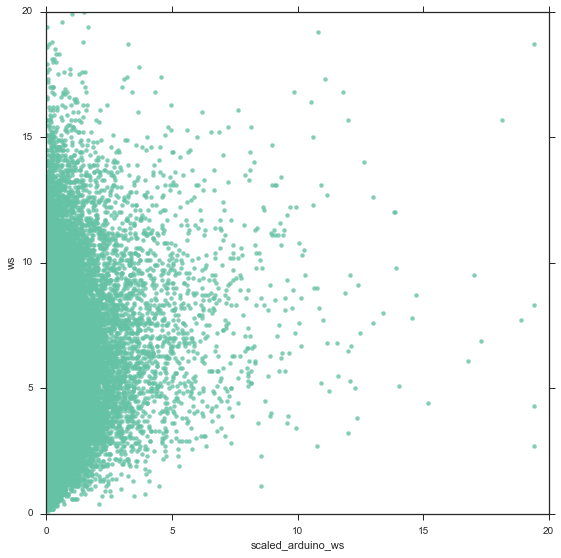

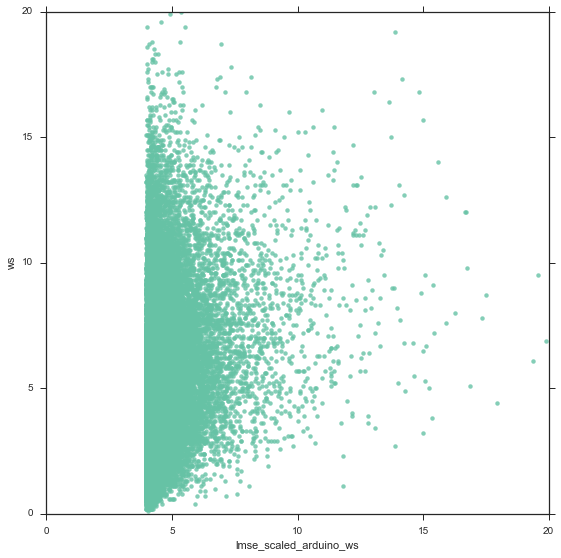

In [10]:
#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'ws'
scaled_col = 'scaled_arduino_ws'
new_col = 'lmse_scaled_arduino_ws'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )

def minimize_me(x):
    return np.nansum(((x[0]*result[scaled_col].values + x[1]) - result[ref_col].values)**2)

x0 = np.array([1.,0.])
res = minimize(minimize_me, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
print('nelder-mead minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='Powell',
                options={'disp': True})
print('powell minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='BFGS',
                options={'disp': True})
print('BFGS minimization= %s\n' % res3.x)

result[new_col] = result[scaled_col]*res.x[0]+res.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)


total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)

total_rmse = math.sqrt( np.nansum((result[new_col].values - result[ref_col].values)**2) / len(result) )
print 'after optimization rmse = %s' % total_rmse

Optimization terminated successfully.
         Current function value: 1444510.242670
         Iterations: 33
         Function evaluations: 69
nelder-mead minimization= [ 2.88463308]

Optimization terminated successfully.
         Current function value: 1444510.242670
         Iterations: 2
         Function evaluations: 19
powell minimization= 2.88463305296

Optimization terminated successfully.
         Current function value: 1444510.242670
         Iterations: 3
         Function evaluations: 24
         Gradient evaluations: 8
BFGS minimization= [ 2.88463306]

original rmse = 4.61956430131
after optimization rmse = 4.28292576097


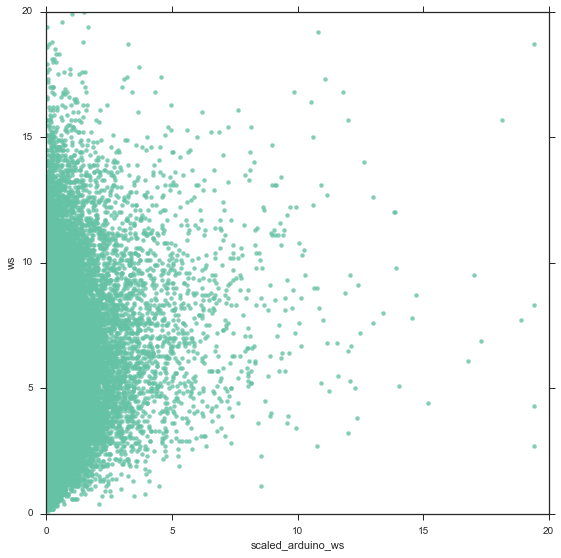

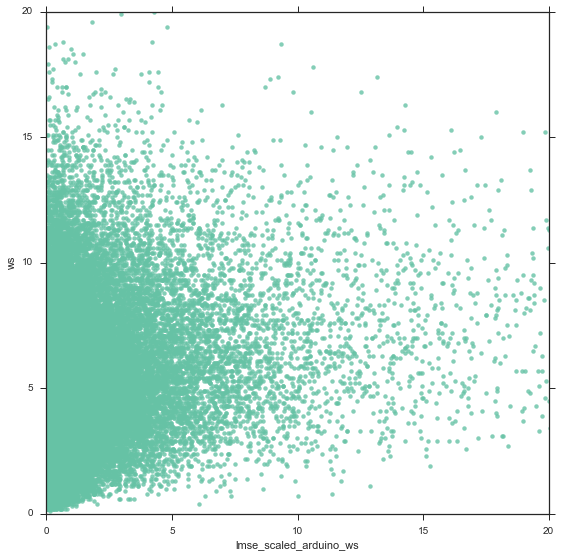

In [11]:
#-OR- RMS fit - *JUST* scale factor, no offset

#find a where we minimize sqrt( sum((a*scaled_ws)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'ws'
scaled_col = 'scaled_arduino_ws'
new_col = 'lmse_scaled_arduino_ws'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )

def minimize_me(x):
    return np.nansum(((x*result[scaled_col].values) - result[ref_col].values)**2)

x0 = 1.0
res = minimize(minimize_me, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
print('nelder-mead minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='Powell',
                options={'disp': True})
print('powell minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='BFGS',
                options={'disp': True})
print('BFGS minimization= %s\n' % res3.x)

result[new_col] = result[scaled_col]*res.x


fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(scaled_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)

total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(new_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)

total_rmse = math.sqrt( np.nansum((result[new_col].values - result[ref_col].values)**2) / len(result) )
print 'after optimization rmse = %s' % total_rmse

Optimization terminated successfully.
         Current function value: 419645.262664
         Iterations: 24
         Function evaluations: 48
nelder-mead minimization= [ 7.48552036]

Optimization terminated successfully.
         Current function value: 419645.262664
         Iterations: 2
         Function evaluations: 98
powell minimization= 7.48552045432

         Current function value: 419645.262664
         Iterations: 3
         Function evaluations: 19
         Gradient evaluations: 6
BFGS minimization= [ 7.48552049]

original rmse = 4.34929506917
after optimization rmse = 2.30845490989


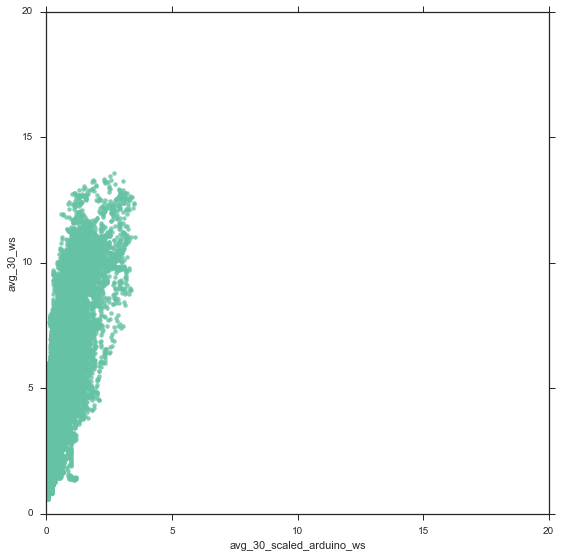

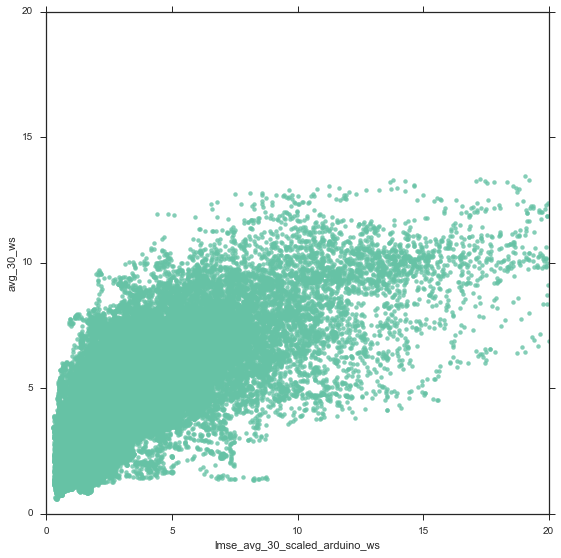

In [12]:
#-OR- RMS fit - *JUST* scale factor, no offset WITH MOVING AVERAGE DATA

#find a where we minimize sqrt( sum((a*scaled_ws)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'avg_30_ws'
scaled_col = 'avg_30_scaled_arduino_ws'
new_col = 'lmse_avg_30_scaled_arduino_ws'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )

def minimize_me(x):
    return np.nansum(((x*result[scaled_col].values) - result[ref_col].values)**2)

x0 = 10.0
res = minimize(minimize_me, x0, method='nelder-mead',
                options={'xtol': 1e-6, 'disp': True})
print('nelder-mead minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='Powell',
                options={'maxiter':50000, 'disp': True})
print('powell minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='BFGS',
                options={'disp': True})
print('BFGS minimization= %s\n' % res3.x)

result[new_col] = result[scaled_col]*res.x


fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(scaled_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)

total_rmse = math.sqrt( np.nansum((result[scaled_col].values - result[ref_col].values)**2) / len(result) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(new_col, ref_col, data=result, fit_reg=False)
plt.ylim(0,20)
plt.xlim(0,20)

total_rmse = math.sqrt( np.nansum((result[new_col].values - result[ref_col].values)**2) / len(result) )
print 'after optimization rmse = %s' % total_rmse

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'scaled_arduino_ws' 'wd' 'ws' 'avg_30_scaled_arduino_ws' 'avg_30_ws'
 'lmse_scaled_arduino_ws' 'lmse_avg_30_scaled_arduino_ws']


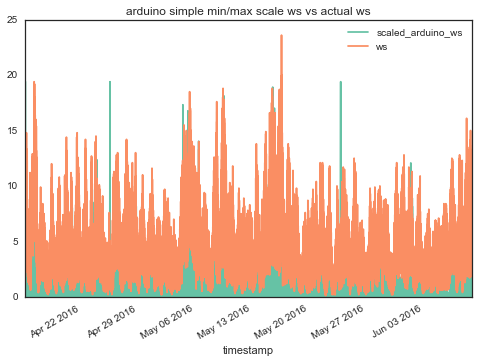

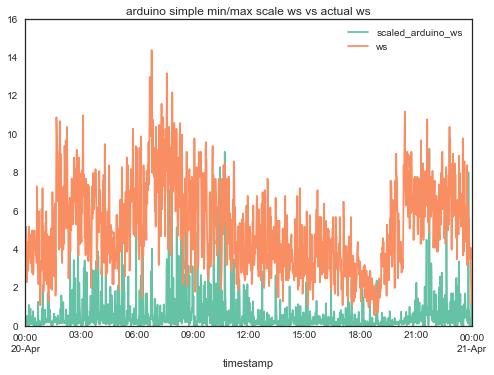

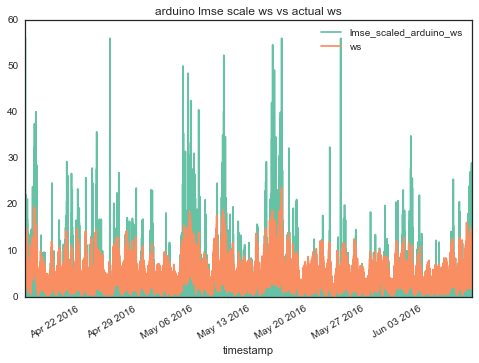

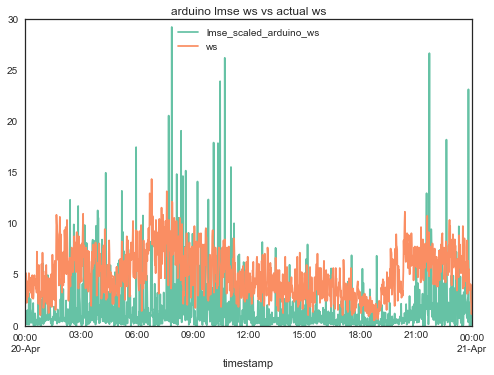

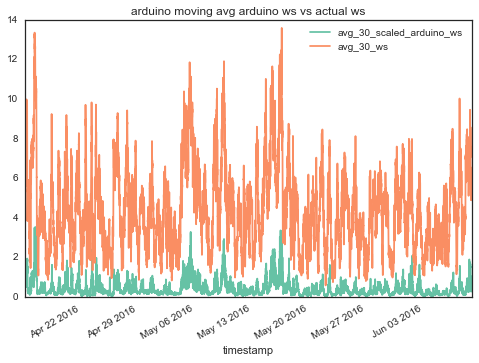

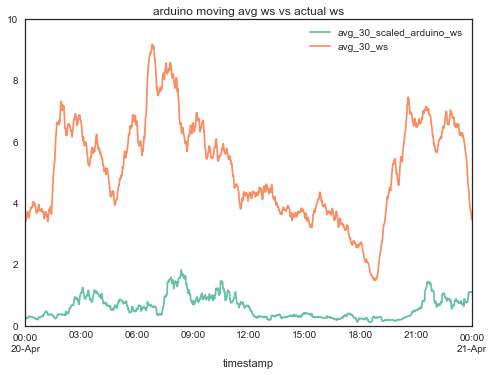

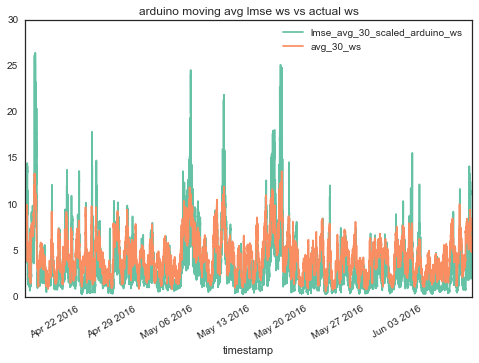

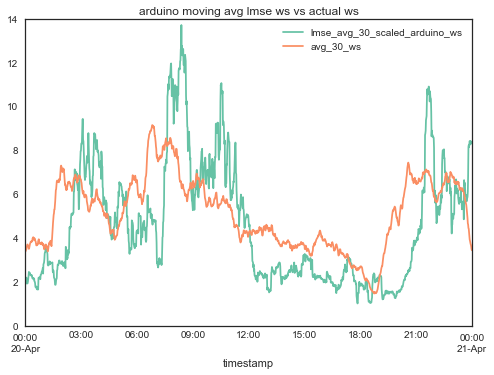

In [14]:
starttime = datetime.datetime(2016,4,20)
endtime = datetime.datetime(2016,4,21)

print result.columns.values

sns.set(style='white', palette='Set2')


#plot arduino ws vs actual ws for full period
plt.figure(figsize=(24, 18))
result.plot(y=['scaled_arduino_ws', 'ws'])
plt.title('arduino simple min/max scale ws vs actual ws')

#plot arduino ws vs actual ws for subset of days
result.ix[starttime: endtime].plot(y=['scaled_arduino_ws', 'ws'])
plt.title('arduino simple min/max scale ws vs actual ws')


#plot lmse arduino vs actual for full period
plt.figure(figsize=(24, 18))
result.plot(y=['lmse_scaled_arduino_ws', 'ws'])
plt.title('arduino lmse scale ws vs actual ws')

#plot lmse arduino vs actual for subset of days
result.ix[starttime: endtime].plot(y=['lmse_scaled_arduino_ws', 'ws'])
plt.title('arduino lmse ws vs actual ws')


#plot moving average arduino vs moving average actual for full period
plt.figure(figsize=(24, 18))
result.plot(y=['avg_30_scaled_arduino_ws', 'avg_30_ws'])
plt.title('arduino moving avg arduino ws vs actual ws')

#plot moving average arduino vs moving average actual for subset of days
result.ix[starttime: endtime].plot(y=['avg_30_scaled_arduino_ws', 'avg_30_ws'])
plt.title('arduino moving avg ws vs actual ws')


#plot lmse moving average arduino vs moving average actual for full period
plt.figure(figsize=(24, 18))
result.plot(y=['lmse_avg_30_scaled_arduino_ws', 'avg_30_ws'])
plt.title('arduino moving avg lmse ws vs actual ws')

#plot lmse moving average arduino vs moving average actual for subset of days
result.ix[starttime: endtime].plot(y=['lmse_avg_30_scaled_arduino_ws', 'avg_30_ws'])
plt.title('arduino moving avg lmse ws vs actual ws')

13.58
0.679


(0, 15)

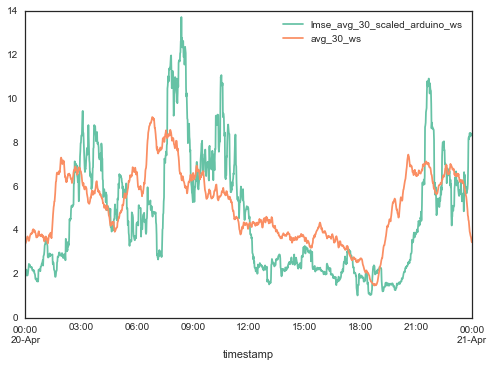

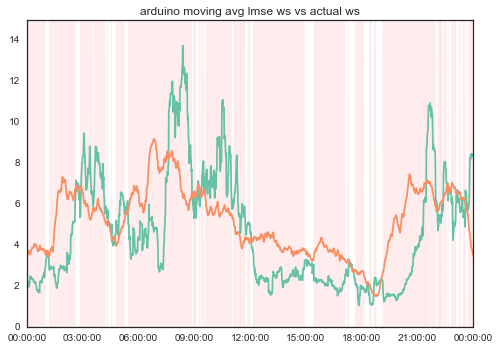

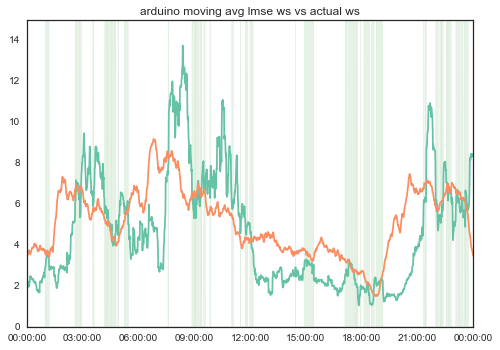

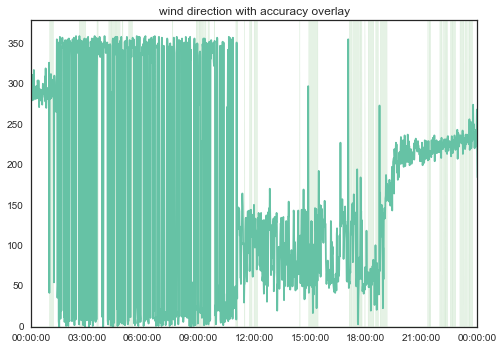

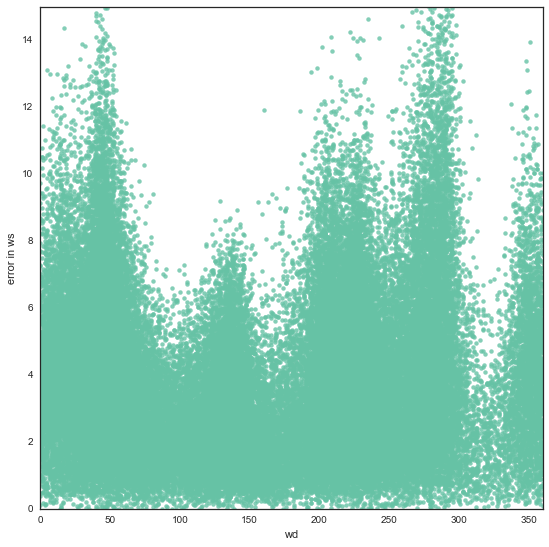

In [17]:
#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'lmse_avg_30_scaled_arduino_ws'
ref_col = 'avg_30_ws'
accurate_col = 'avg_30_ws_compare_accurate_10_percent'


tolerance = 0.1 #within 5 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * result[ref_col].max()) / 2.0

print result[ref_col].max()
print abs_tol


result[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(result[main_col], result[ref_col]) ]


result.ix[starttime: endtime].plot(y=['lmse_avg_30_scaled_arduino_ws', 'avg_30_ws'])


#color red where we're 'not accurate'
fig, ax = plt.subplots()
plt.plot(result.ix[starttime:endtime].index.values, result.ix[starttime:endtime]['lmse_avg_30_scaled_arduino_ws'])
plt.plot(result.ix[starttime:endtime]['avg_30_ws'])

accurate_axis = abs(result.ix[starttime: endtime][accurate_col]-1)*result[ref_col].max()*2
#plt.plot(accurate_axis, color='red', alpha=0.04)
ax.fill_between(result.ix[starttime:endtime].index.values, 0, accurate_axis, color='red', alpha=0.07)

plt.title('arduino moving avg lmse ws vs actual ws')
plt.ylim(0,15)


#color green where we're 'accurate'
fig, ax = plt.subplots()
plt.plot(result.ix[starttime:endtime].index.values, result.ix[starttime:endtime]['lmse_avg_30_scaled_arduino_ws'])
plt.plot(result.ix[starttime:endtime]['avg_30_ws'])

accurate_axis = result.ix[starttime: endtime][accurate_col]*result[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(result.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.title('arduino moving avg lmse ws vs actual ws')
plt.ylim(0,15)



#plot wind direction with accuracy overlay to see if direction and accuracy have some relationship
fig, ax = plt.subplots()
plt.plot(result.ix[starttime:endtime].index.values, result.ix[starttime:endtime]['wd'])

accurate_axis = result.ix[starttime: endtime][accurate_col]*result['wd'].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(result.ix[starttime:endtime].index.values, 0, accurate_axis, color='green', alpha=0.1)

plt.title('wind direction with accuracy overlay')
plt.ylim(0,result['wd'].max()+20)



#plot wind error vs wind-direction
fig, ax = plt.subplots(figsize=(9,9))
df = pd.DataFrame({'wd': result['wd'].values, 'error in ws':[abs(val-ref_val) for val, ref_val in zip(result['scaled_arduino_ws'].values, result['ws'])]})
sns.regplot('wd', 'error in ws', data=df, fit_reg=False)
#sns.regplot(result['wd'].values, [abs(val-ref_val) for val, ref_val in zip(result['scaled_ws'].values, result['ws'])], fit_reg=False)
#ax.scatter(result['wd'].values, [abs(val-ref_val) for val, ref_val in zip(result['scaled_ws'].values, result['ws'])])
plt.xlim(0,result['wd'].max())
plt.ylim(0,15)

In [19]:
#nice color values from:
#http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

#scale RGB vals to [0,1]
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
    

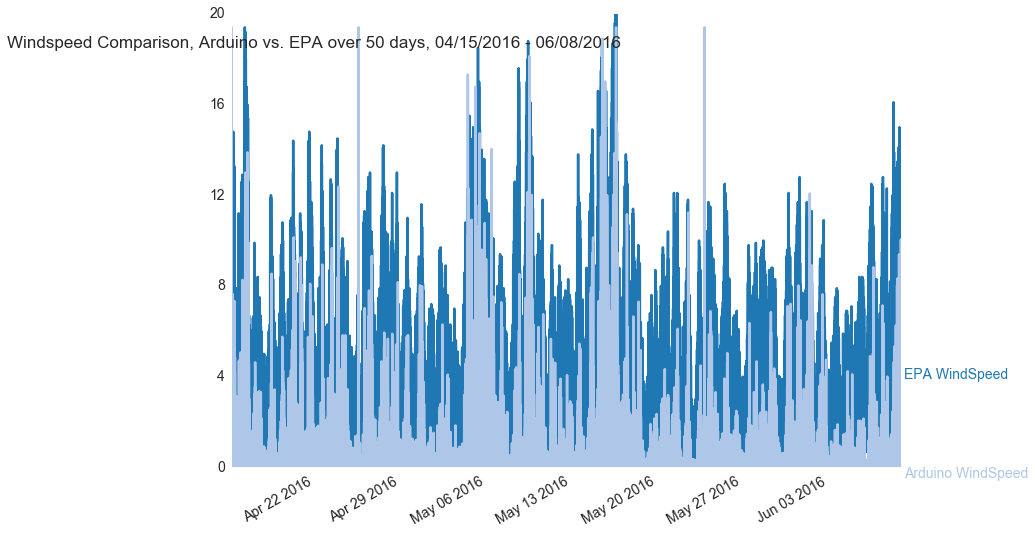

In [20]:
fig = plt.figure(figsize=(12, 9))

ymin = 0
ymax = 20
ystep = 4

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, ymax)    
#plt.xlim(, 2014) 

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(ymin, ymax+1, ystep), fontsize=14)    
plt.xticks(fontsize=14) 


# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
#for y in range(ymin+ystep, ymax, ystep):    
#    plt.plot(len(result), [y] * len(result), "--", lw=0.5, color="black", alpha=0.3) 
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
majors = [{'display':'EPA WindSpeed', 'col':'ws'}, 
          {'display':'Arduino WindSpeed', 'col':'scaled_arduino_ws'}]    
  
for rank, column in enumerate(majors):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(result.index.values,    
            result[column['col']].values,    
            lw=2.5, color=tableau20[rank])
    
    y_pos = result[column['col']].values[-1] - 0.5   
    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.
    plt.text(result.index.values[-1]+np.timedelta64(6,'h'), y_pos, column['display'], fontsize=14, color=tableau20[rank]) 
    
plt.text(np.datetime64('2016-04-22'), 18.5, "Windspeed Comparison, Arduino vs. EPA over 50 days"    
       ", 04/15/2016 - 06/08/2016", fontsize=17, ha="center")    

#plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"    
#       "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"    
#       "\nNote: Some majors are missing because the historical data "    
#       "is not available for them", fontsize=10) 

# Finally, save the figure as a PNG.       
#plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight") 

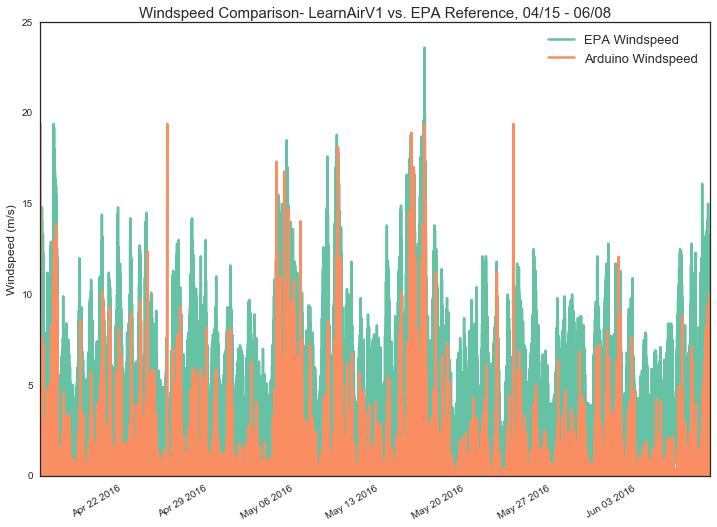

In [21]:
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')
    
plt.plot(result.index.values, result['ws'].values, lw=2.5)
plt.plot(result.index.values, result['scaled_arduino_ws'].values, lw=2.5)

plt.legend(['EPA Windspeed','Arduino Windspeed'], fontsize=13, )
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.title('Windspeed Comparison- LearnAirV1 vs. EPA Reference, 04/15 - 06/08', fontsize=15)

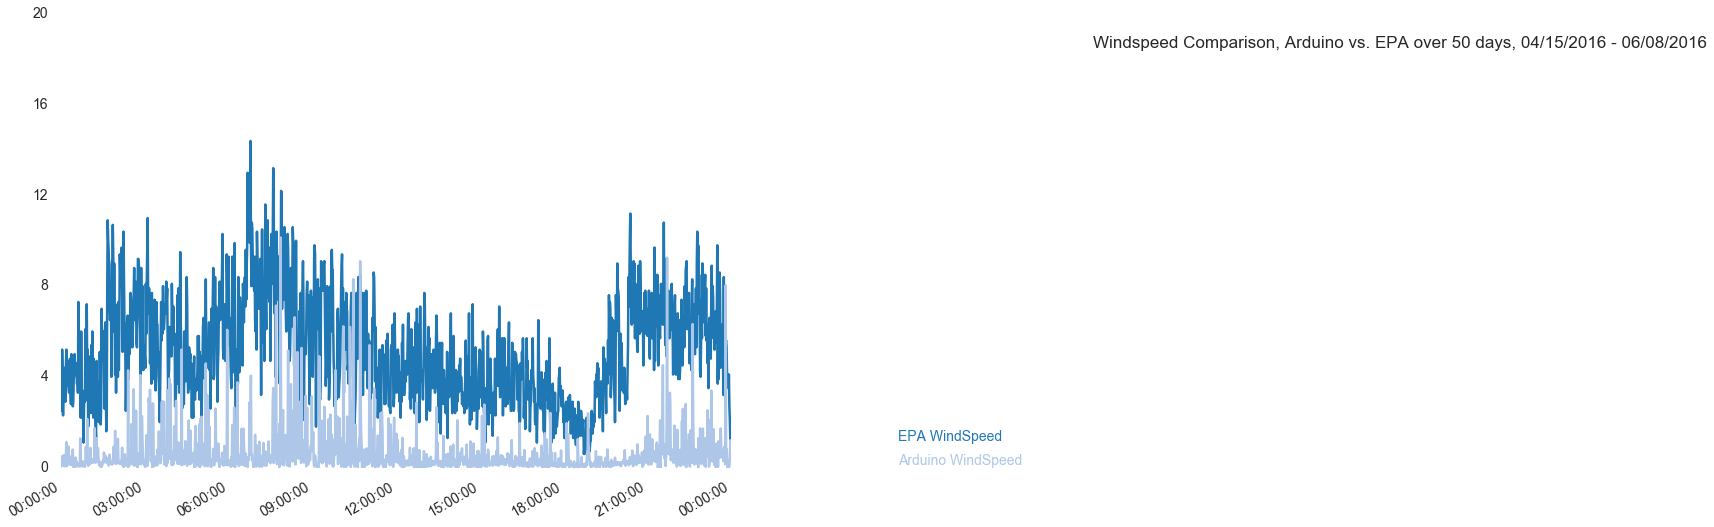

In [74]:
result = result.ix[starttime: endtime]

fig = plt.figure(figsize=(12, 9))

ymin = 0
ymax = 20
ystep = 4

# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, ymax)    
#plt.xlim(, 2014) 

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(ymin, ymax+1, ystep), fontsize=14)    
plt.xticks(fontsize=14) 


# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
#for y in range(ymin+ystep, ymax, ystep):    
#    plt.plot(len(result), [y] * len(result), "--", lw=0.5, color="black", alpha=0.3) 
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.    
print_columns = [{'display':'EPA WindSpeed', 'col':'ws'}, 
          {'display':'Arduino WindSpeed', 'col':'scaled_ws'}]    
  
for rank, column in enumerate(print_columns):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    plt.plot(result.index.values,    
            result[column['col']].values,    
            lw=2.5, color=tableau20[rank])
    
    y_pos = result[column['col']].values[-1] - 0.5   
    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.
    plt.text(result.index.values[-1]+np.timedelta64(6,'h'), y_pos, column['display'], fontsize=14, color=tableau20[rank]) 
    
plt.text(np.datetime64('2016-04-22'), 18.5, "Windspeed Comparison, Arduino vs. EPA over 50 days"    
       ", 04/15/2016 - 06/08/2016", fontsize=17, ha="center")    

#plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"    
#       "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"    
#       "\nNote: Some majors are missing because the historical data "    
#       "is not available for them", fontsize=10) 

# Finally, save the figure as a PNG.       
#plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight") 

In [22]:
print result.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'scaled_arduino_ws' 'wd' 'ws' 'avg_30_scaled_arduino_ws' 'avg_30_ws'
 'lmse_scaled_arduino_ws' 'lmse_avg_30_scaled_arduino_ws'
 'avg_30_ws_compare_accurate_10_percent']
